   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       Setosa  
1        0       Setosa  
2        0       Setosa  
3        0       Setosa  
4        0       Setosa  


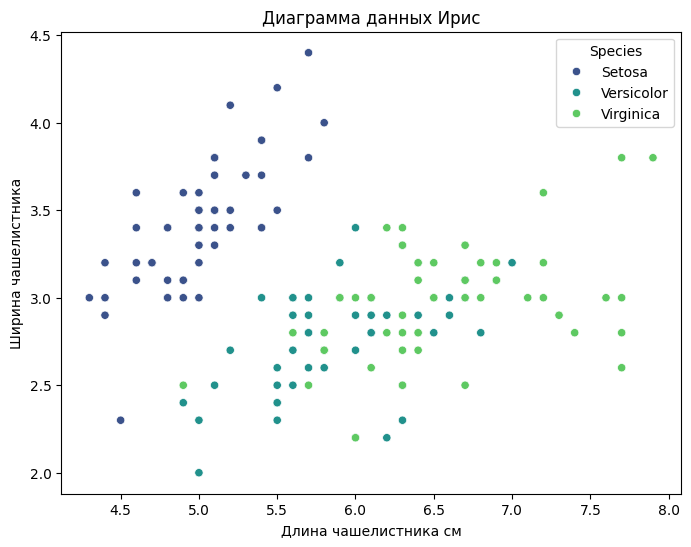

In [86]:
from sklearn.datasets import load_iris
import pandas as pd

# Загрузка данных
iris = load_iris()

# Преобразуем данные в DataFrame для удобства
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species_name'] = iris_df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Посмотрим на первые строки данных
print(iris_df.head())
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация двух признаков
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=iris_df,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='species_name',
    palette='viridis'
)
plt.title('Диаграмма данных Ирис')
plt.xlabel('Длина чашелистника см')
plt.ylabel('Ширина чашелистника')
plt.legend(title='Species')
plt.show()


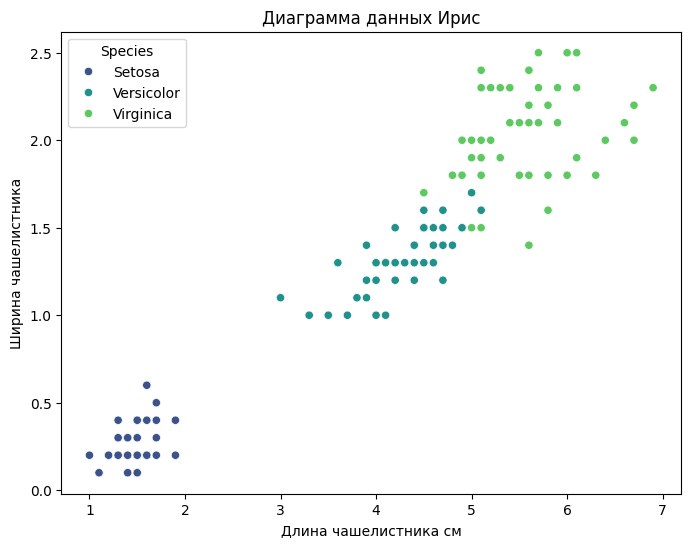

In [87]:
# Визуализация длины и ширины лепестка
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=iris_df,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='species_name',
    palette='viridis'
)
plt.title('Диаграмма данных Ирис')
plt.xlabel('Длина чашелистника см')
plt.ylabel('Ширина чашелистника')
plt.legend(title='Species')
plt.show()


In [55]:
import numpy as np
from sklearn.datasets import load_iris

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Создание тестового набора
dataset = X[:150:15]
output = y[:150:15]


In [56]:
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))


In [88]:
# Вычисление расстояний
distances = [euclidean_distance(dataset[5], dataset[i]) for i in range(len(dataset))]

# Вывод расстояний
for i, dist in enumerate(distances):
    print(f"Расстояние до набора данных[{i}]: {dist}")


Расстояние до набора данных[0]: 3.59722114972099
Расстояние до набора данных[1]: 3.4899856733230297
Расстояние до набора данных[2]: 3.539774004085572
Расстояние до набора данных[3]: 3.66742416417845
Расстояние до набора данных[4]: 2.128379665379276
Расстояние до набора данных[5]: 0.0
Расстояние до набора данных[6]: 1.1874342087037915
Расстояние до набора данных[7]: 2.5159491250818244
Расстояние до набора данных[8]: 1.6217274740226855
Расстояние до набора данных[9]: 2.2158519806160335


In [90]:
def get_neighbors(train_set, labels, test_row, num_neighbors):
    distances = []
    for i, train_row in enumerate(train_set):
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist, labels[i]))
    # Сортируем по расстоянию
    distances.sort(key=lambda x: x[1])
    # Возвращаем k ближайших соседей
    return distances[:num_neighbors]


In [91]:
# Получение ближайших соседей
neighbors = get_neighbors(dataset, output, dataset[5], 3)

# Вывод результатов
for neighbor in neighbors:
    print(neighbor)


(array([6.6, 3. , 4.4, 1.4]), 0.0, 1)
(array([5.5, 2.6, 4.4, 1.2]), 1.1874342087037915, 1)
(array([6.9, 3.2, 5.7, 2.3]), 1.6217274740226855, 2)


In [92]:
from collections import Counter

def predict_classification(train_set, labels, test_row, num_neighbors):
    neighbors = get_neighbors(train_set, labels, test_row, num_neighbors)
    # Получаем метки классов соседей
    neighbor_labels = [neighbor[2] for neighbor in neighbors]
    # Считаем количество каждого класса и возвращаем наиболее частый
    most_common = Counter(neighbor_labels).most_common(1)
    return most_common[0][0]


In [93]:
# Предсказание класса
prediction = predict_classification(dataset, output, dataset[5], 3)

# Вывод результата
print('Expected %d, Got %d.' % (output[5], prediction))


Expected 1, Got 1.


In [94]:
def k_nearest_neighbors(train_set, labels, test_set, num_neighbors):
    predictions = []
    for test_row in test_set:
        prediction = predict_classification(train_set, labels, test_row, num_neighbors)
        predictions.append(prediction)
    return predictions


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Задаем количество соседей
num_neighbors = 5

# Применяем k-NN
predictions = k_nearest_neighbors(X_train, y_train, X_test, num_neighbors)

# Оцениваем точность
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy with k={num_neighbors}: {accuracy:.2f}')


Accuracy with k=5: 1.00


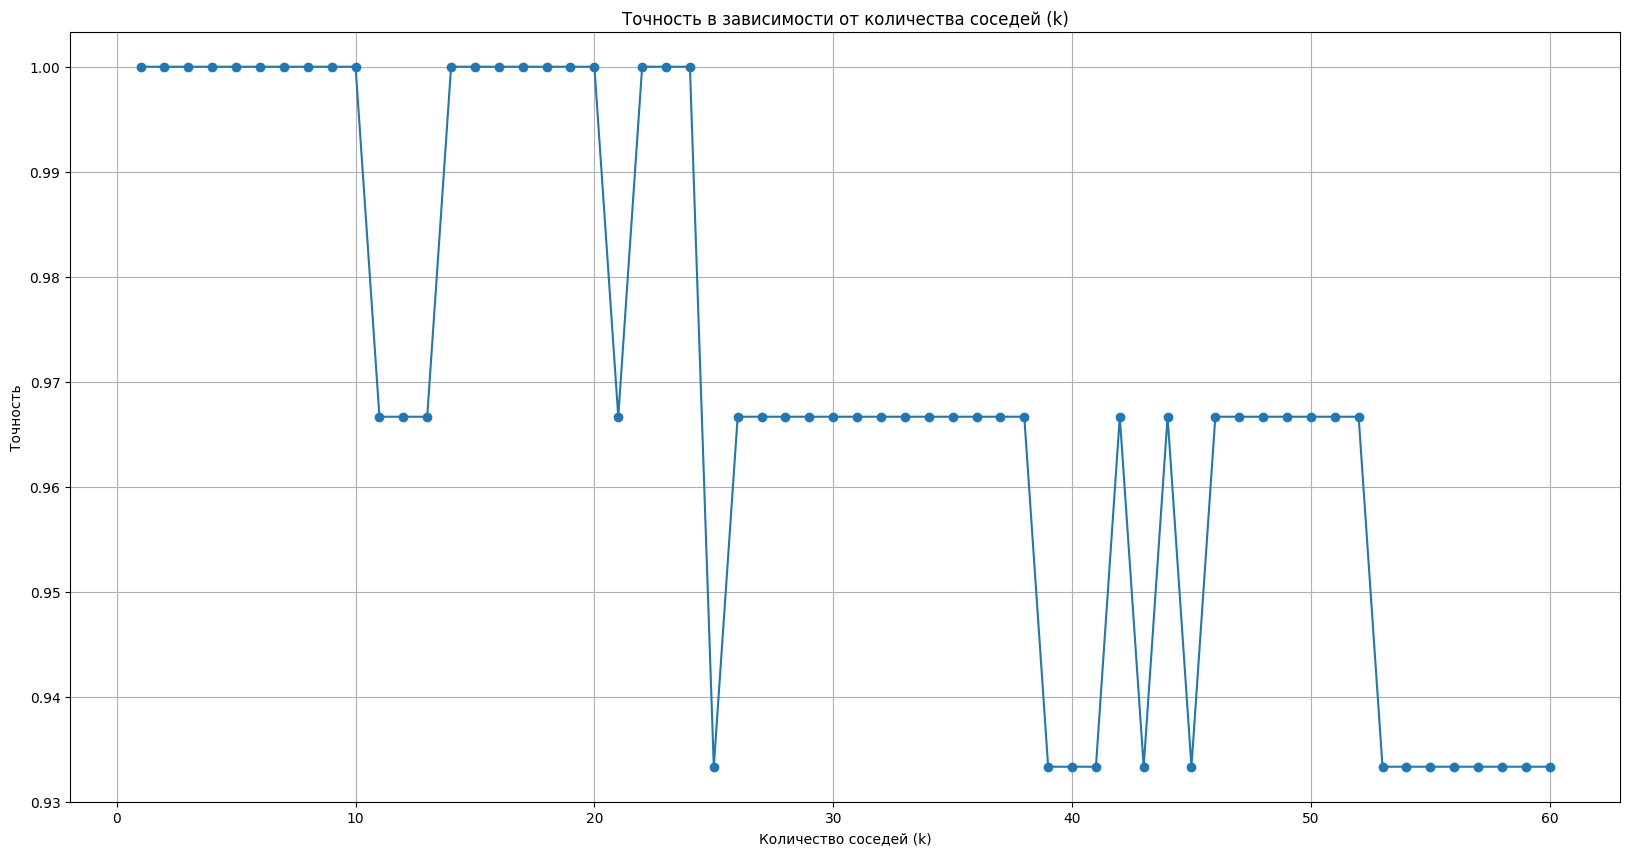

In [104]:
import matplotlib.pyplot as plt

# Список для хранения точностей
accuracies = []

# Тестируем разные значения k
k_values = range(1, 61)
for k in k_values:
    predictions = k_nearest_neighbors(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Строим график
plt.figure(figsize=(20, 10))
plt.plot(k_values, accuracies, marker='o')
plt.title('Точность в зависимости от количества соседей (k)')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность')
plt.grid()
plt.show()


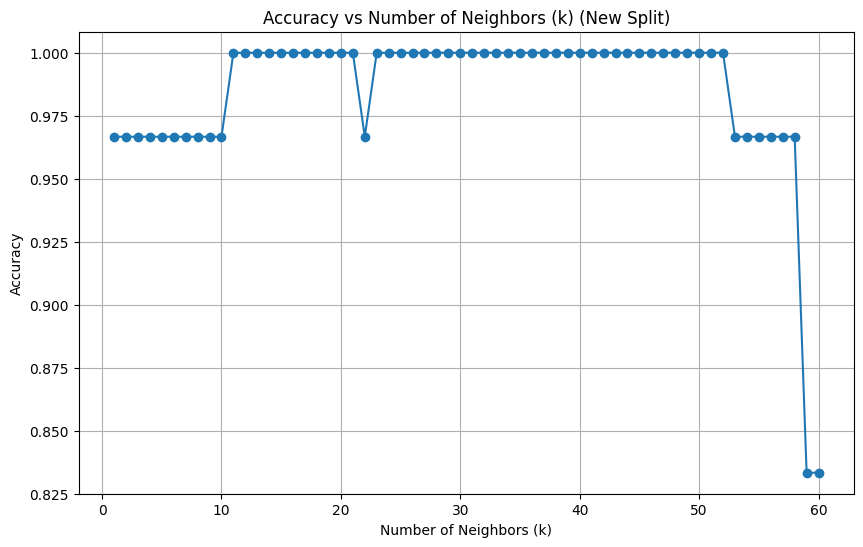

In [65]:
# Новое разбиение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Снова рассчитываем точности
accuracies = []
for k in k_values:
    predictions = k_nearest_neighbors(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs Number of Neighbors (k) (New Split)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


2 раздел


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных для логистической регрессии (не обязательно для k-NN, но полезно для сравнения)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [105]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация k-NN классификатора
k = 5  # Задаем число соседей
knn = KNeighborsClassifier(n_neighbors=k)

# Обучение
knn.fit(X_train, y_train)

# Предсказание
knn_predictions = knn.predict(X_test)

# Точность
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'Точность k-NN (k={k}): {knn_accuracy:.2f}')


Точность k-NN (k=5): 1.00


In [106]:
from sklearn.linear_model import LogisticRegression

# Инициализация логистической регрессии
log_reg = LogisticRegression(max_iter=200)

# Обучение
log_reg.fit(X_train_scaled, y_train)

# Предсказание
log_reg_predictions = log_reg.predict(X_test_scaled)

# Точность
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print(f'Точность логистической регрессии: {log_reg_accuracy:.2f}')


Точность логистической регрессии: 0.43


In [107]:
# Вывод точности k-NN
print(f'Точность k-NN (k=5): {knn_accuracy:.2f}')

# Вывод точности логистической регрессии
print(f'Точность логистической регрессии: {log_reg_accuracy:.2f}')


Точность k-NN (k=5): 1.00
Точность логистической регрессии: 0.43


3 раздел


Точность дерева принятия решений: 1.00


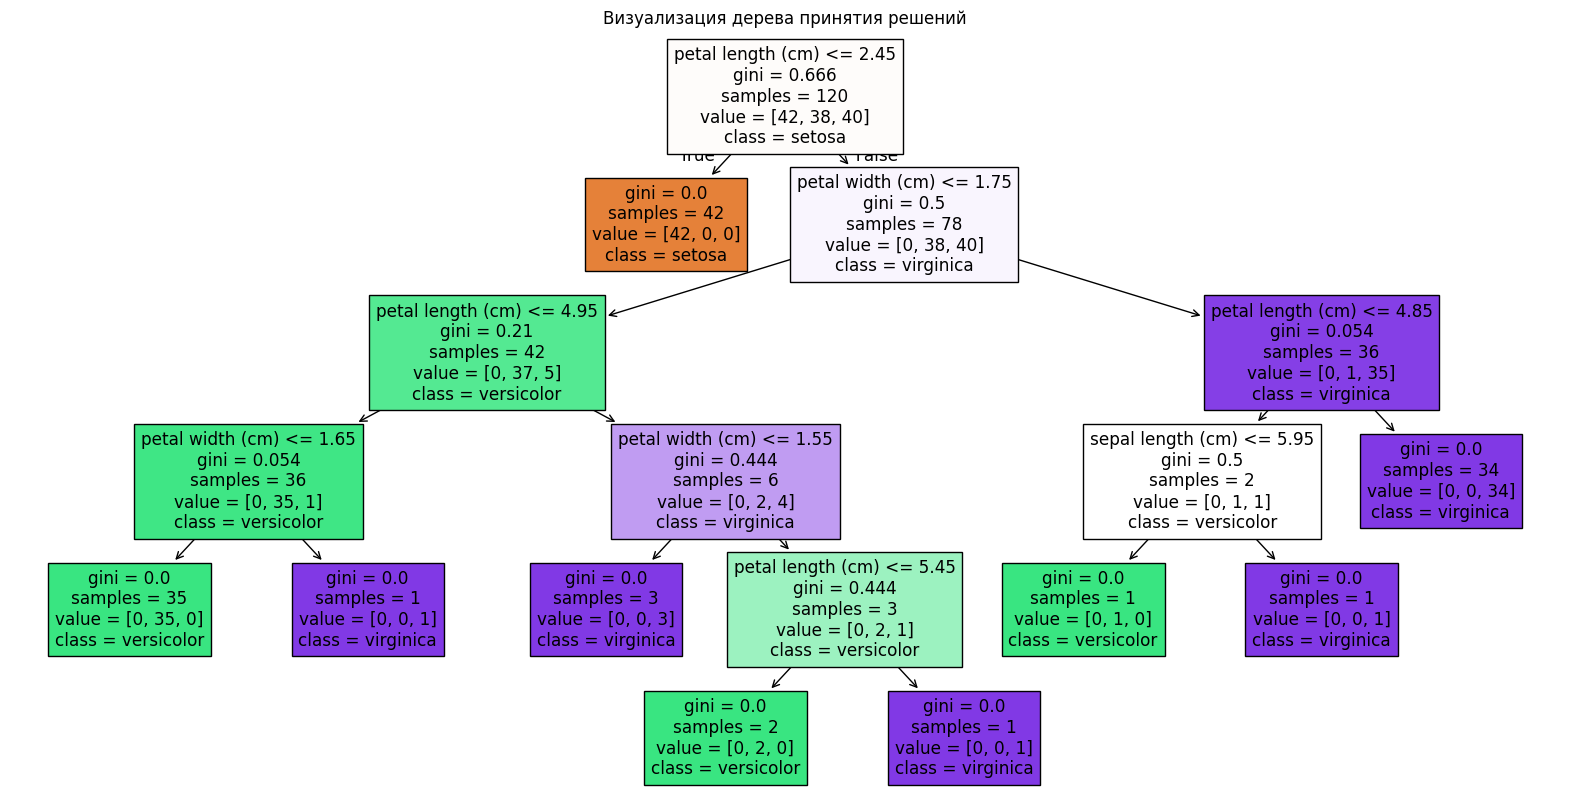

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Инициализация и обучение дерева
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Предсказание
tree_predictions = tree.predict(X_test)

# Точность
tree_accuracy = accuracy_score(y_test, tree_predictions)
print(f'Точность дерева принятия решений: {tree_accuracy:.2f}')

# Визуализация дерева
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Визуализация дерева принятия решений")
plt.show()


In [110]:
# Переобученное дерево
overfitted_tree = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)
overfitted_tree.fit(X_train, y_train)

# Точность переобученного дерева
overfitted_predictions = overfitted_tree.predict(X_test)
overfitted_accuracy = accuracy_score(y_test, overfitted_predictions)
print(f'Точность определенного дерева: {overfitted_accuracy:.2f}')


Точность определенного дерева: 1.00


In [111]:
from sklearn.ensemble import RandomForestClassifier

# Инициализация случайного леса
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
random_forest.fit(X_train, y_train)

# Предсказание
rf_predictions = random_forest.predict(X_test)

# Точность
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Точность случайного леса: {rf_accuracy:.2f}')


Точность случайного леса: 1.00


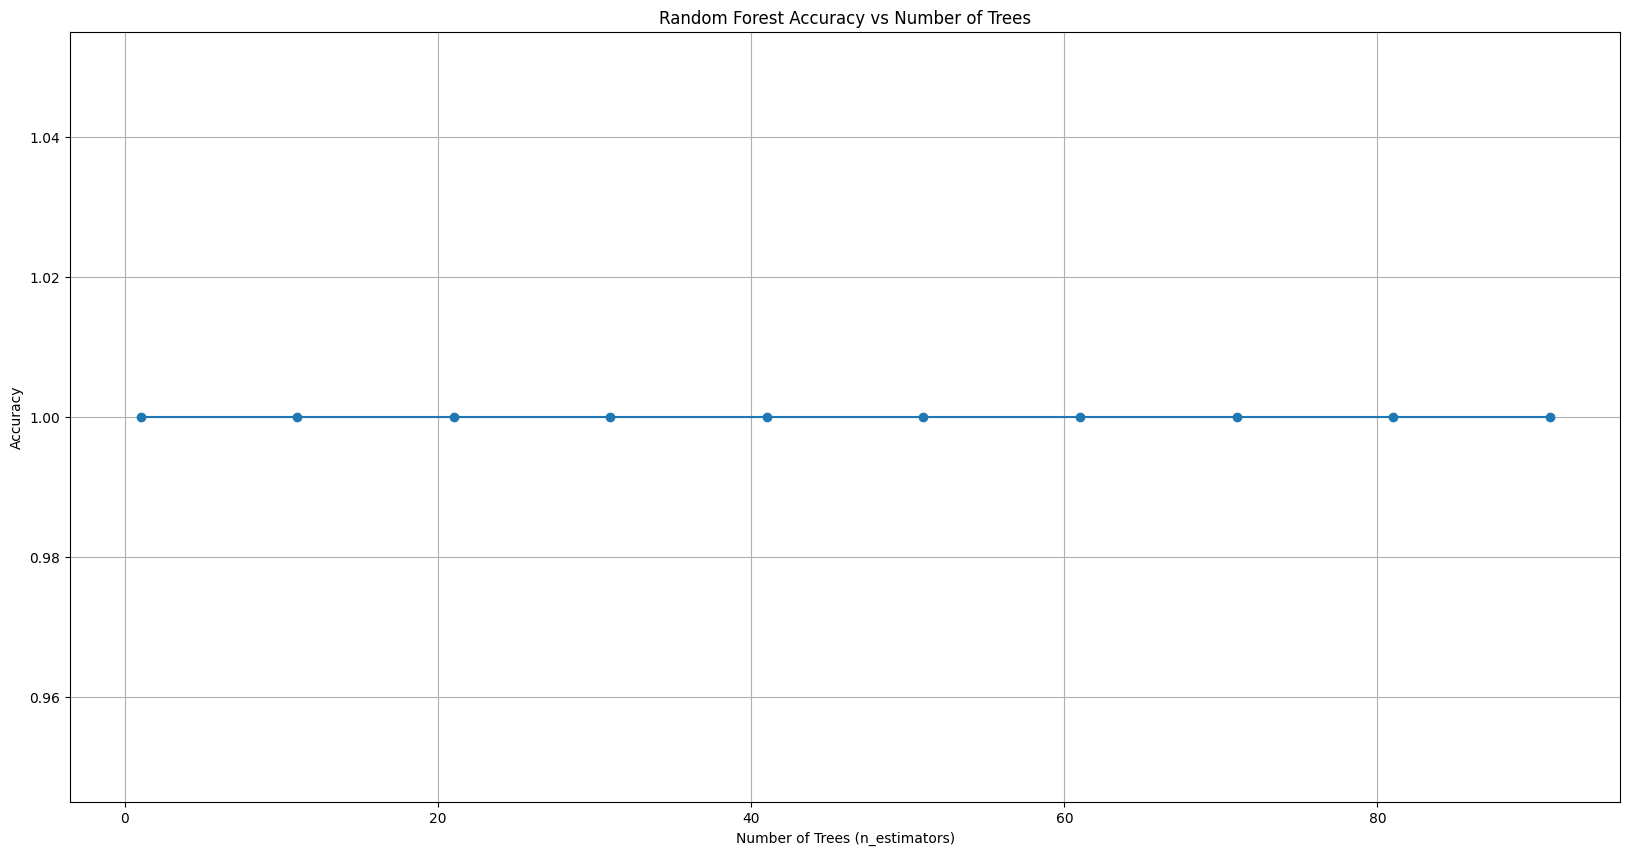

In [80]:
accuracies = []
n_estimators_values = range(1, 101, 10)
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, max_depth=5, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    accuracies.append(acc)

plt.figure(figsize=(20, 10))
plt.plot(n_estimators_values, accuracies, marker='o')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [77]:
from sklearn.ensemble import GradientBoostingClassifier

# Инициализация и обучение
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# Предсказание
gb_predictions = gb.predict(X_test)

# Точность
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f'Accuracy of Gradient Boosting: {gb_accuracy:.2f}')


Accuracy of Gradient Boosting: 1.00


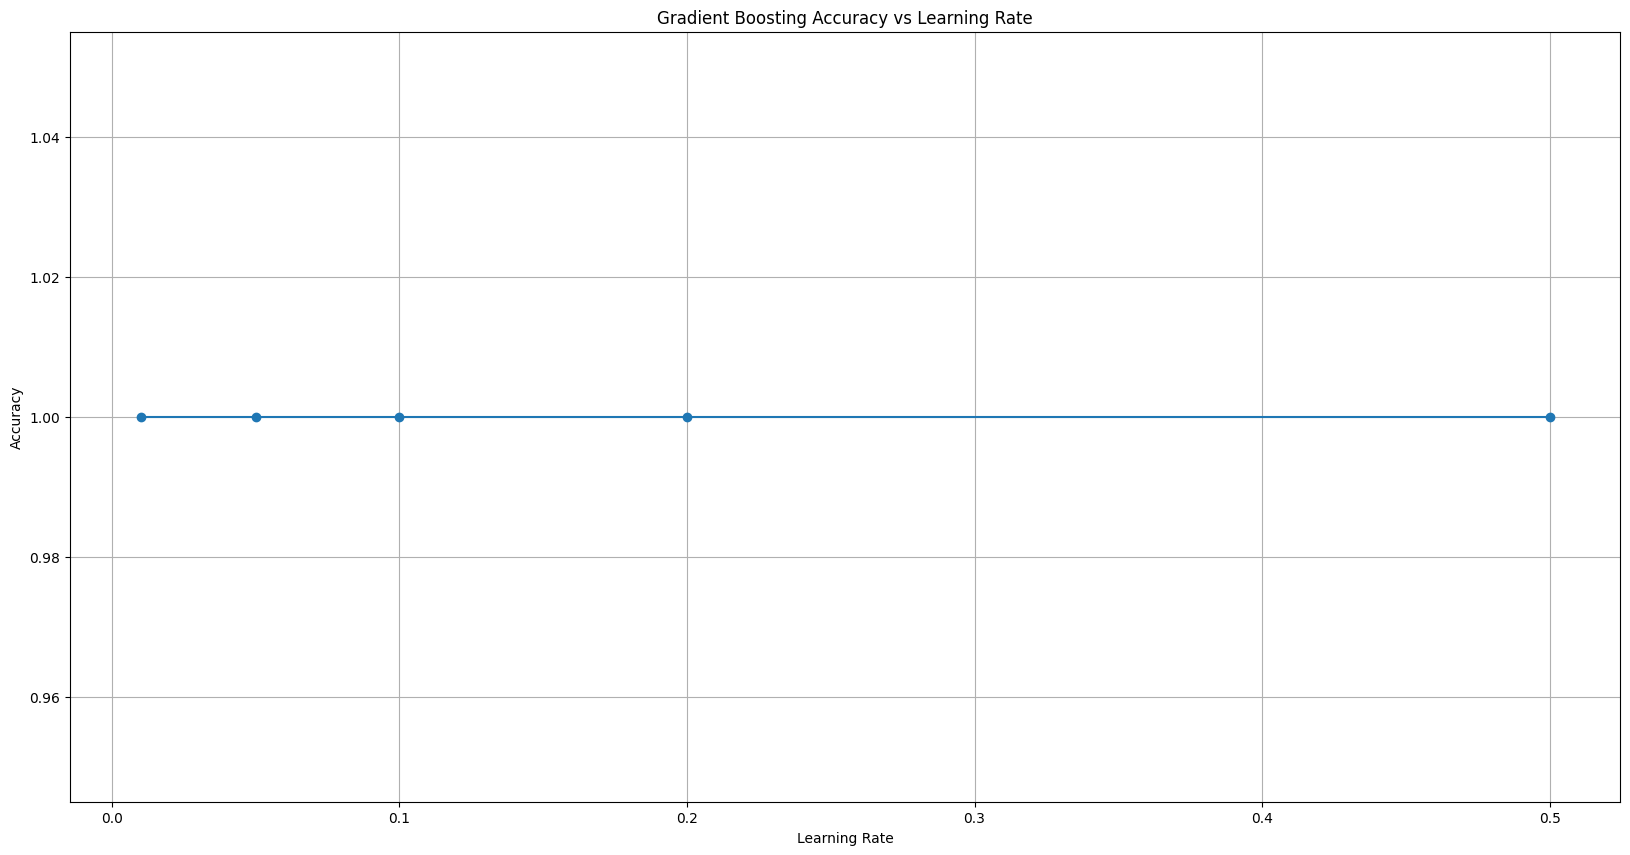

In [79]:
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5]
accuracies = []

for lr in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=lr, max_depth=3, random_state=42)
    gb.fit(X_train, y_train)
    acc = accuracy_score(y_test, gb.predict(X_test))
    accuracies.append(acc)

plt.figure(figsize=(20, 10))
plt.plot(learning_rates, accuracies, marker='o')
plt.title('Gradient Boosting Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


пример с одним деревом и решением его переобучения

Переобученный случайный лес - Точность тренировочного тестирования: 1.00
Переобученный случайный лес - Точность тестирования: 1.00


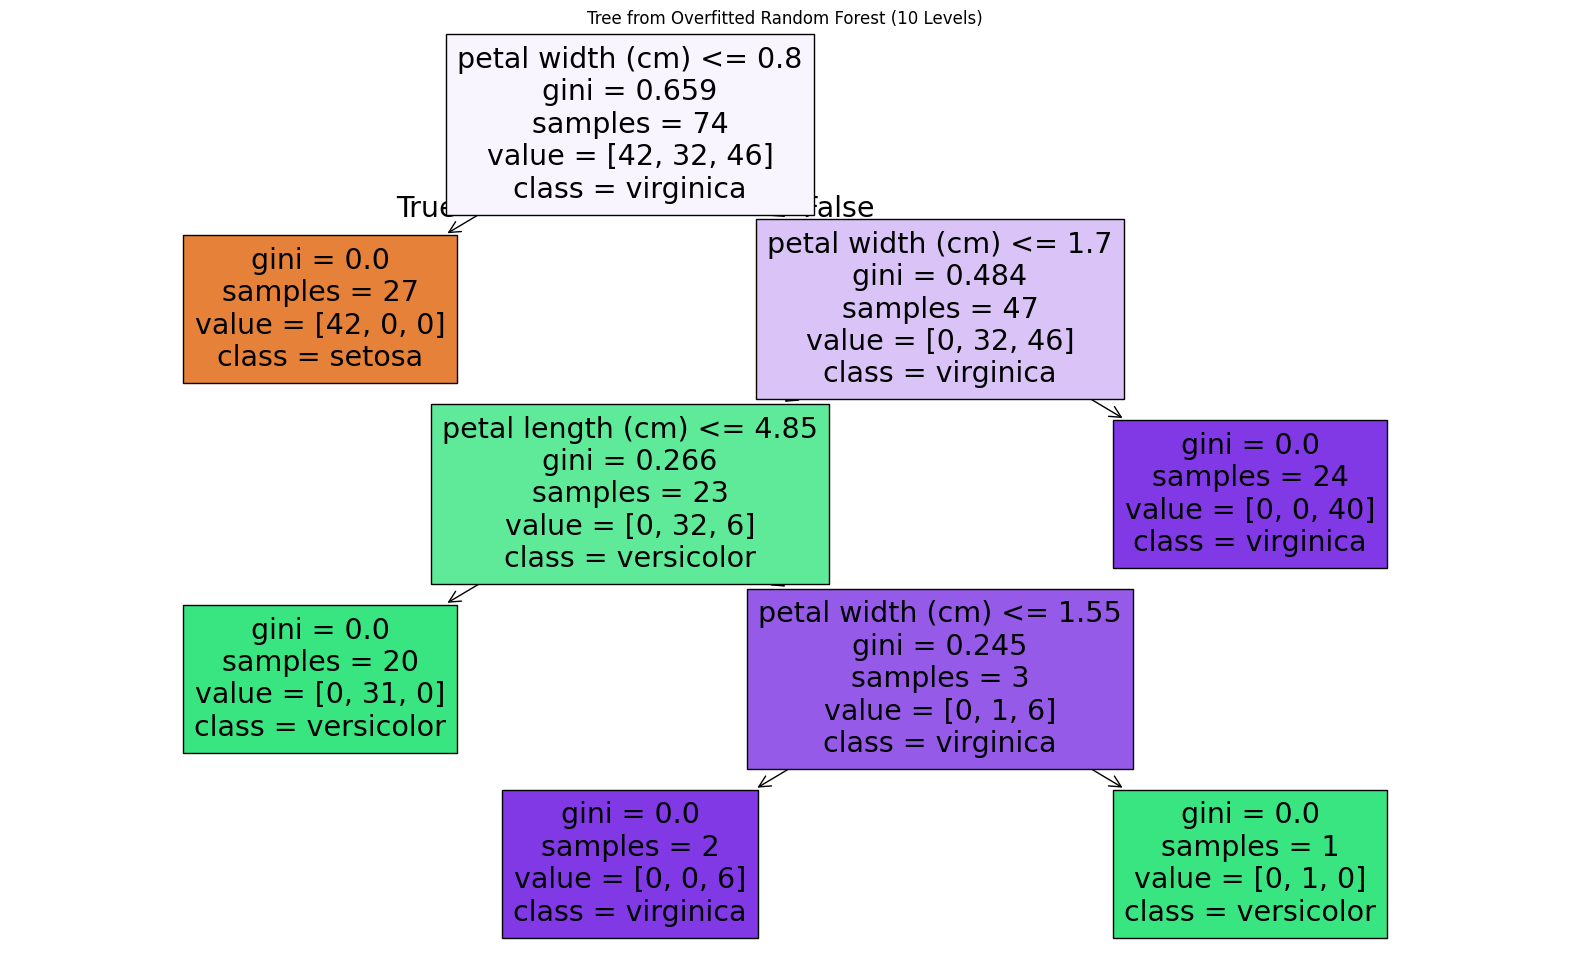

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Переобученная модель случайного леса
overfitted_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
overfitted_rf.fit(X_train, y_train)

# Точность на обучающей и тестовой выборках
train_accuracy = accuracy_score(y_train, overfitted_rf.predict(X_train))
test_accuracy = accuracy_score(y_test, overfitted_rf.predict(X_test))

print(f'Переобученный случайный лес - Точность тренировочного тестирования: {train_accuracy:.2f}')
print(f'Переобученный случайный лес - Точность тестирования: {test_accuracy:.2f}')

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Визуализация дерева из переобученной модели
plt.figure(figsize=(20, 12))
plot_tree(
    overfitted_rf.estimators_[0],  # Выбор первого дерева из ансамбля
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    max_depth=10  # Отображение первых 10 уровней
)
plt.title("Tree from Overfitted Random Forest (10 Levels)")
plt.show()




Переобученный случайный лес - Точность тренировочного тестирования: 0.96
Переобученный случайный лес - Точность тестирования: 1.00


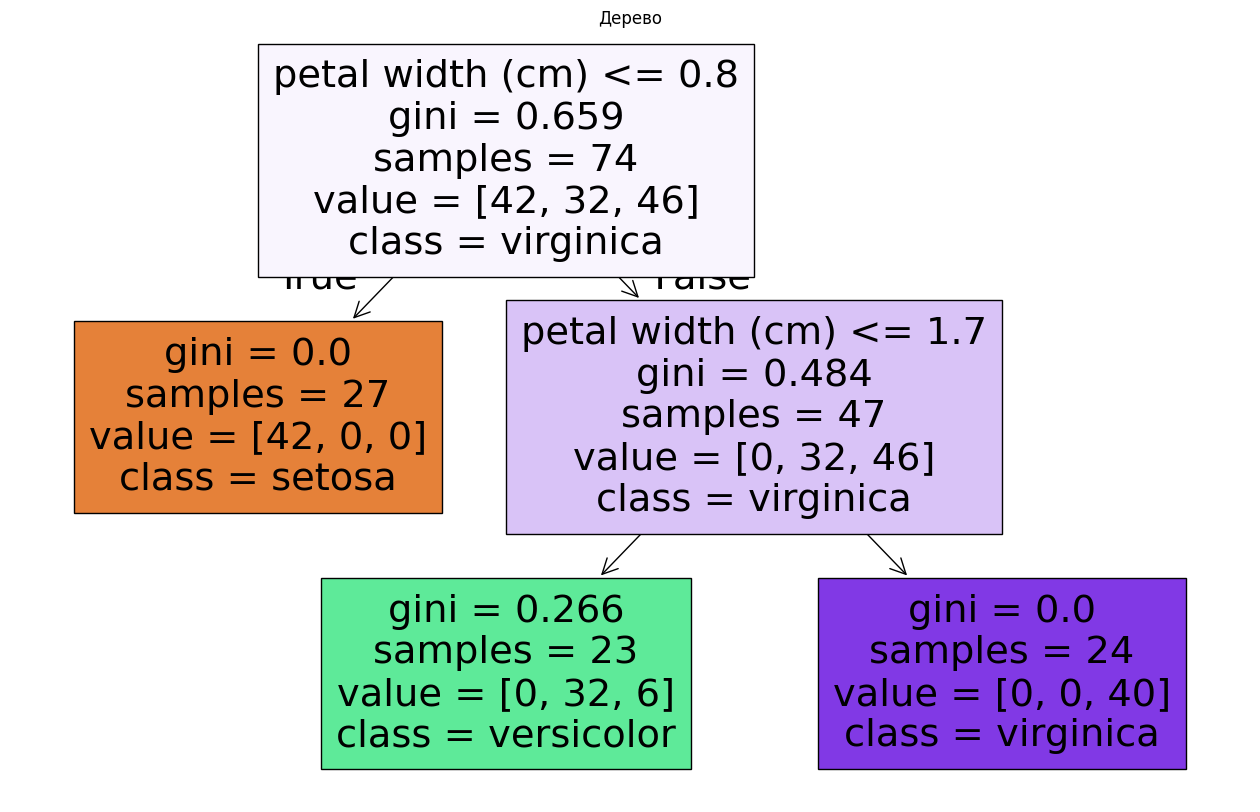

In [142]:
# Оптимизированная модель случайного леса
optimized_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    random_state=42
)
optimized_rf.fit(X_train, y_train)

# Точность на обучающей и тестовой выборках
optimized_train_accuracy = accuracy_score(y_train, optimized_rf.predict(X_train))
optimized_test_accuracy = accuracy_score(y_test, optimized_rf.predict(X_test))


print(f'Переобученный случайный лес - Точность тренировочного тестирования: {optimized_train_accuracy:.2f}')
print(f'Переобученный случайный лес - Точность тестирования: {optimized_test_accuracy:.2f}')

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Визуализация одного дерева из оптимизированной модели
plt.figure(figsize=(16, 10))
plot_tree(
    optimized_rf.estimators_[0],  # Выбор первого дерева из ансамбля
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    max_depth=3  # Отобразим только первые 3 уровня для читаемости
)
plt.title("Дерево")
plt.show()
